<a href="https://colab.research.google.com/github/oroszlevi/GitTest/blob/master/Labor6_KF_IKM_GL_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurális hálók

A mostani gyakorlat/labor témája egyszerű neurális hálók tanítása lesz a PyTorch függvénykönyvtár segítségével.

## GPU és CUDA ellenőrzése

A !nvcc --version parancs segítségével ellenőrizhető a CUDA verziója

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


## Fontos könyvtárak installálása

Torch, torchvision

In [ ]:
!pip3 install torch torchvision

## PyTorch és CUDA ellenőrzése

In [ ]:
import torch
haveCuda = torch.cuda.is_available()
print(haveCuda)

True


## Segédfüggvény, hogy legyen progress bar

In [ ]:
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

## Számítási gráf numpy segítségével



In [ ]:
import numpy as np

np.random.seed(42)

a = np.random.randn(2)
b = np.random.randn(2)
c = np.random.randn(2)

d = 2*a+0.5*b
e = np.sum(c*d)

print(e)

grad_e = np.ones(2) #c*d gradiense
grad_c=grad_e*d
grad_d=grad_e*c
grad_a=grad_d*2
grad_b=grad_d*0.5

print(grad_a, grad_b, grad_c)

-0.42199704138300664
[-0.46830675 -0.46827391] [-0.11707669 -0.11706848] [1.31727258 0.48498633]


## Számítási gráf PyTorch segítségével

In [ ]:
import torch

np.random.seed(42)

a = torch.Tensor(np.random.randn(2)).requires_grad_(True)
b = torch.Tensor(np.random.randn(2)).requires_grad_(True)
c = torch.Tensor(np.random.randn(2)).requires_grad_(True)

d = 2*a+0.5*b
e=(c*d).sum()

print(e.item())
e.backward()
print(a.grad, b.grad, c.grad)

-0.4219970405101776
tensor([-0.4683, -0.4683]) tensor([-0.1171, -0.1171]) tensor([1.3173, 0.4850])


## Lineáris modell definiálása

In [ ]:
from torch import nn

class Linear(nn.Module):
  def __init__(self, Nin, Nout):
      super().__init__()
      self.W = nn.Parameter(torch.randn(Nout, Nin))
      self.Nout = Nout

  def forward (self, x):
      return torch.addmv(torch.zeros(self.Nout), self.W, x) #y +=W*x

myNeuron = Linear(128,2)
myInput = torch.randn(128)
y = myNeuron(myInput)
print(y)

tensor([ 16.5828, -20.2288], grad_fn=<AddmvBackward>)


## Lineáris modell tanítása

2.2234868580053444


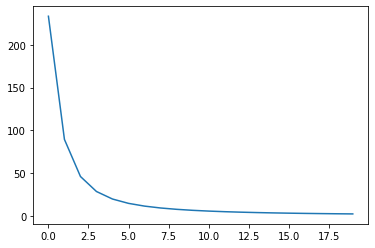

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

torch.manual_seed(42)

Nin = 128
Nout = 2
Nd = 128 # hány adatunk van

myNeuron = Linear (128,2)
trainX = torch.randn(Nd, Nin)
trainY = torch.randn(Nd, Nout)

lr = 1e-3
losses = []
numEpoch = 20

for i in range(numEpoch):
    running_loss = 0
    for x,y in zip(trainX, trainY):

        y_pred=myNeuron(x)
        loss = ((y-y_pred)**2).sum()
        loss.backward()

        with torch.no_grad():
            myNeuron.W -= lr *myNeuron.W.grad
            myNeuron.W.grad.zero_()

        running_loss += loss.item()
    losses.append(running_loss/Nd)
print(losses[-1])
plt.plot(losses)

## Beépített függvények használata

In [ ]:
class MLP(nn.Module):
  def __init__(self, Nin, Nout, Nhid):
      super().__init__()
      self.L1 = nn.Linear(Nin, Nhid)
      self.L2 = nn.Linear(Nhid, Nout)

  def forward (self, x):
      return self.L2(torch.sigmoid(self.L1(x))) 

Nhid = 256
myNet = MLP(Nin, Nout, Nhid)
y = myNet(myInput)
print(y)

tensor([ 0.5283, -0.2884], grad_fn=<AddBackward0>)


## Tanítás beépített függvényekkel

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

torch.manual_seed(42)

dataset = tensorData(trainX, trainY)
dataloader =  DataLoader(dataset, batch_size=4, shuffle=True)

myNet = MLP(Nin, Nout, Nhid)

optimizer = optim.SGD(myNet.parameters(), lr=1e-2, weight_decay=1e-5)
criterion == nn.MSELoss()

losses = []
epochNum = 500
bestLoss =10000000

for i in range(epochNum):
    running_loss = 0

    for x, y in daltaloader:
        

## Tanítás CUDA segítségével

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

torch.manual_seed(42)
torch.backends.cudnn.deterministric = True
torch.backends.cudnn.bechmark = False

dataset = tensorData(trainX, trainY)
dataloader =  DataLoader(dataset, batch_size=4, shuffle=True)

myNet = MLP(Nin, Nout, Nhid)
if haveCude:
    myNet = myNet.cuda()

optimizer = optim.SGD(myNet.parameters(), lr=1e-2, weight_decay=1e-5)
criterion == nn.MSELoss()

losses = []
epochNum = 500
bestLoss =10000000

for i in range(epochNum):
    running_loss = 0

    for x, y in daltaloader:
        

## Validáció

## Önálló feladat: Értelmes adat tanítása

Próbáld meg az y = x^2 függvényt betanítani a hálónak! Vizsgáld meg hogyan változik a tanítás a különböző paraméterek változtatásának hatására:

*   Learning rate
*   Adj hozzá véletlen zajt a kimenethez (mindkettőhöz, próbálj ki 2-3 különböző nagyságú zajt)
*   A háló neuronszáma













In [ ]:
Nin = 2
Nout = 2
  